# Pymaceuticals Inc.
---

### Analysis

- Add your analysis here.
 

In [87]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single dataset
study_data_complete = pd.merge(study_results, mouse_metadata, how="left", on=["Mouse ID", "Mouse ID"])

# Display the data table for preview
study_data_complete.head()
study_data_complete.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1893 entries, 0 to 1892
Data columns (total 8 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Mouse ID            1893 non-null   object 
 1   Timepoint           1893 non-null   int64  
 2   Tumor Volume (mm3)  1893 non-null   float64
 3   Metastatic Sites    1893 non-null   int64  
 4   Drug Regimen        1893 non-null   object 
 5   Sex                 1893 non-null   object 
 6   Age_months          1893 non-null   int64  
 7   Weight (g)          1893 non-null   int64  
dtypes: float64(1), int64(4), object(3)
memory usage: 133.1+ KB


In [88]:
# Checking the number of mice.
total_mice = len(mouse_metadata["Mouse ID"].unique())
total_mice

249

In [89]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
duplicates = study_data_complete[study_data_complete.duplicated(['Mouse ID', 'Timepoint'])]
duplicates

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
137,g989,0,45.000000,0,Propriva,Female,21,26
360,g989,5,47.570392,0,Propriva,Female,21,26
681,g989,10,49.880528,0,Propriva,Female,21,26
869,g989,15,53.442020,0,Propriva,Female,21,26
1111,g989,20,54.657650,1,Propriva,Female,21,26


In [90]:
# Optional: Get all the data for the duplicate mouse ID. 
duplicate_mice_IDs = duplicates["Mouse ID"].unique()
duplicate_mice = study_data_complete.loc[study_data_complete['Mouse ID'].isin(duplicate_mice_IDs) == True]
duplicate_mice

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
107,g989,0,45.000000,0,Propriva,Female,21,26
137,g989,0,45.000000,0,Propriva,Female,21,26
329,g989,5,48.786801,0,Propriva,Female,21,26
360,g989,5,47.570392,0,Propriva,Female,21,26
620,g989,10,51.745156,0,Propriva,Female,21,26
681,g989,10,49.880528,0,Propriva,Female,21,26
815,g989,15,51.325852,1,Propriva,Female,21,26
869,g989,15,53.442020,0,Propriva,Female,21,26
950,g989,20,55.326122,1,Propriva,Female,21,26
1111,g989,20,54.657650,1,Propriva,Female,21,26


In [91]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
cleaned_study_data = study_data_complete.drop(duplicates.index)
cleaned_study_data

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.000000,0,Capomulin,Female,9,22
1,f932,0,45.000000,0,Ketapril,Male,15,29
2,g107,0,45.000000,0,Ketapril,Female,2,29
3,a457,0,45.000000,0,Ketapril,Female,11,30
4,c819,0,45.000000,0,Ketapril,Male,21,25
...,...,...,...,...,...,...,...,...
1888,r944,45,41.581521,2,Capomulin,Male,12,25
1889,u364,45,31.023923,3,Capomulin,Male,18,17
1890,p438,45,61.433892,1,Ceftamin,Female,11,26
1891,x773,45,58.634971,4,Placebo,Female,21,30


## Summary Statistics

In [92]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 
# Assemble the resulting series into a single summary DataFrame.

regimen_list = sorted(cleaned_study_data['Drug Regimen'].unique())
regimen_list
summary_stats = pd.DataFrame(index=regimen_list)
summary_stats.index.name = "Drug Regimen"
summary_stats["mean"] = cleaned_study_data.groupby(["Drug Regimen"]).mean()["Tumor Volume (mm3)"]
summary_stats["median"] = cleaned_study_data.groupby(["Drug Regimen"]).median()["Tumor Volume (mm3)"]
summary_stats["var"] = cleaned_study_data.groupby(["Drug Regimen"]).var()["Tumor Volume (mm3)"]
summary_stats["std"] = cleaned_study_data.groupby(["Drug Regimen"]).std()["Tumor Volume (mm3)"]
summary_stats["sem"] = cleaned_study_data.groupby(["Drug Regimen"]).sem()["Tumor Volume (mm3)"]
print(summary_stats)

                   mean     median        var       std       sem
Drug Regimen                                                     
Capomulin     40.675741  41.557809  24.947764  4.994774  0.329346
Ceftamin      52.591172  51.776157  39.290177  6.268188  0.469821
Infubinol     52.884795  51.820584  43.128684  6.567243  0.492236
Ketapril      55.235638  53.698743  68.553577  8.279709  0.603860
Naftisol      54.331565  52.509285  66.173479  8.134708  0.596466
Placebo       54.033581  52.288934  61.168083  7.821003  0.581331
Propriva      52.393463  50.909965  43.138803  6.568014  0.525862
Ramicane      40.216745  40.673236  23.486704  4.846308  0.320955
Stelasyn      54.233149  52.431737  59.450562  7.710419  0.573111
Zoniferol     53.236507  51.818479  48.533355  6.966589  0.516398


In [93]:
# Generate a summary statistics table of mean, median, variance, standard deviation, 
# and SEM of the tumor volume for each regimen
summary_stats_agg = pd.DataFrame(index=regimen_list)
summary_stats_agg.index.name = "Drug Regimen"

# Using the aggregation method, produce the same summary statistics in a single line.
summary_stats_agg = cleaned_study_data.groupby(["Drug Regimen"]).agg(
    # Get mean column for each group
    mean=('Tumor Volume (mm3)',np.mean),
    # Get median column for each group
    median=('Tumor Volume (mm3)', np.median),
    # Get var column for each group
    var=('Tumor Volume (mm3)', np.var),
    # Get std column for each group
    std=('Tumor Volume (mm3)', np.std),
    # Get sem column for each group
    sem=('Tumor Volume (mm3)', st.sem)  
)
summary_stats_agg 


,mean,median,var,std,sem
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.393463,50.909965,43.138803,6.568014,0.525862
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [94]:
summary_stats_agg = cleaned_study_data.groupby(["Drug Regimen"]).agg({
    'Tumor Volume (mm3)': [np.mean, np.median, np.var, np.std, st.sem]
})
summary_stats_agg

right_aligned_df = summary_stats_agg.style.set_properties(**{'text-align': 'right'})
right_aligned_df

## Bar and Pie Charts

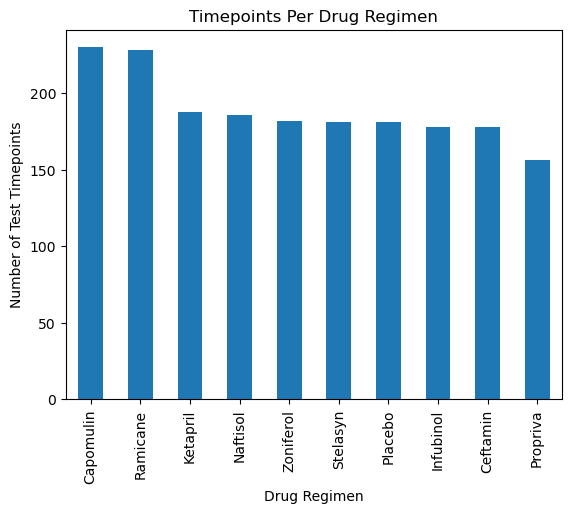

In [108]:
# Generate a bar plot showing the total number of timepoints for all mice tested for each drug regimen using Pandas.
#timepoints = cleaned_study_data.groupby("Drug Regimen").agg({"Timepoint": pd.Series.value_counts}).count
#timepoints
ret = cleaned_study_data['Drug Regimen'].value_counts().plot(kind = 'bar', xlabel = "Drug Regimen", ylabel = "Number of Test Timepoints", title = "Timepoints Per Drug Regimen")

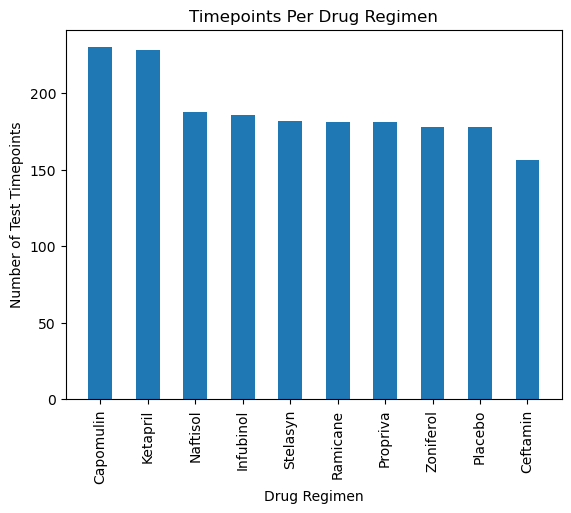

In [107]:
# Generate a bar plot showing the total number of timepoints for all mice tested for each drug regimen using pyplot.

drugs = cleaned_study_data['Drug Regimen'].unique()
timepoints = cleaned_study_data['Drug Regimen'].value_counts()
plt.bar(drugs,timepoints, width = 0.5)
plt.xticks(rotation = 90)
plt.title("Timepoints Per Drug Regimen")
plt.xlabel('Drug Regimen')
plt.ylabel('Number of Test Timepoints')
plt.show()

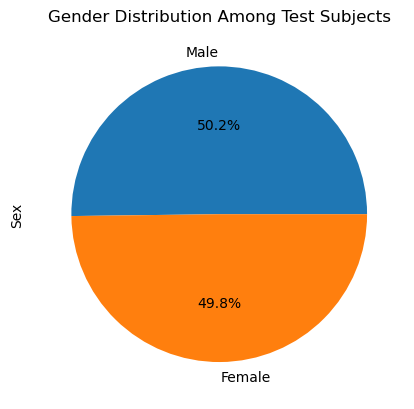

In [113]:
# Generate a pie plot showing the distribution of female versus male mice using Pandas
#duplicates = mouse_metadata[mouse_metadata.duplicated(['Mouse ID'])]
#cleaned_mice = mouse_metadata.drop(duplicates.index)
ret = mouse_metadata['Sex'].value_counts().plot(kind = 'pie', autopct='%1.1f%%', title = 'Gender Distribution Among Test Subjects')


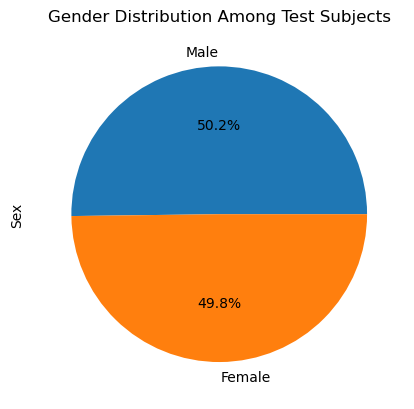

In [114]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot

genders = pd.Series(mouse_metadata['Sex'].unique()).sort_values(ascending=False)
numbers_per = mouse_metadata['Sex'].value_counts().sort_values(ascending=False)
plt.pie(numbers_per, labels = genders, autopct='%1.1f%%')
plt.title('Gender Distribution Among Test Subjects')
plt.ylabel('Sex')
plt.show()

## Quartiles, Outliers and Boxplots

In [99]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin

# Put treatments into a list for for loop (and later for plot labels)
treatments = ['Capomulin', 'Ramicane', 'Infubinol', 'Ceftamin']

final_per_mouse = cleaned_study_data.groupby('Mouse ID').max()['Timepoint']
final_tumors = pd.merge(cleaned_study_data, final_per_mouse, on=['Mouse ID', 'Timepoint'])

In [100]:
# Create empty list to fill with tumor vol data (for plotting)
tumor_volumes = {key: [] for key in treatments}

# Calculate the IQR and quantitatively determine if there are any potential outliers. 
for regimen in treatments:
    # Locate the rows which contain mice on each drug and get the tumor volumes
    volumes = final_tumors[final_tumors['Drug Regimen'] == regimen]['Tumor Volume (mm3)']
    tumor_volumes[regimen] = volumes.values
    
    # Determine outliers using upper and lower bounds
    quartiles = volumes.quantile([.25,.5,.75])
    lowerq = quartiles[0.25]
    upperq = quartiles[0.75]
    iqr = upperq-lowerq
    lower_bound = lowerq - (1.5*iqr)
    upper_bound = upperq + (1.5*iqr)
    outliers = []
    for vol in volumes.values:
        if (vol < lower_bound or vol > upper_bound):
            outliers.append(vol)
    if len(outliers) == 0:
        print(f"There are no outliers for {regimen}.")
    else:
        print(f"{regimen} has the following potential outliers:", end =" ")
        for vol in outliers:
            print(f"{vol} ", end =" ")
        print()
         

There are no outliers for Capomulin.
There are no outliers for Ramicane.
Infubinol has the following potential outliers: 36.3213458  
There are no outliers for Ceftamin.


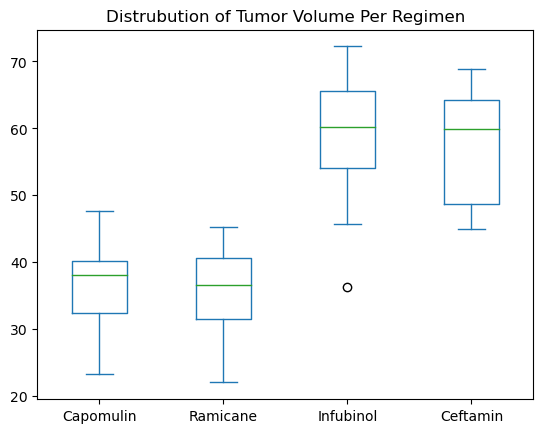

In [115]:
# Generate a box plot that shows the distrubution of the tumor volume for each treatment group.
tumor_volume_df = pd.DataFrame(tumor_volumes)
ax = tumor_volume_df[treatments].plot(kind='box',title = 'Distrubution of Tumor Volume Per Regimen')
plt.show()


## Line and Scatter Plots

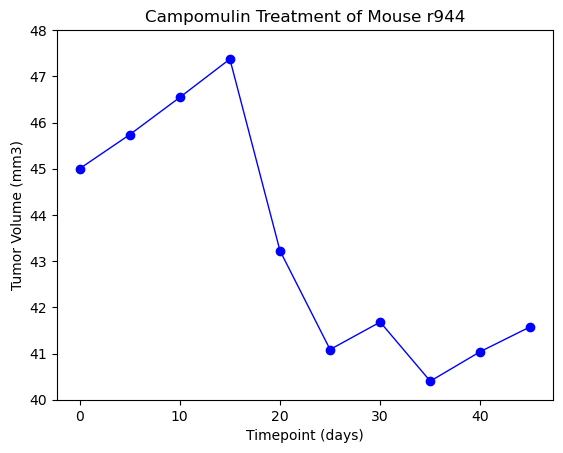

In [102]:
# Generate a line plot of tumor volume vs. time point for a mouse treated with Capomulin
capomulin_mouse = cleaned_study_data[cleaned_study_data['Mouse ID'] == "r944"]
plt.plot(capomulin_mouse['Timepoint'], capomulin_mouse['Tumor Volume (mm3)'], linewidth=1, marker="o", color="blue")
plt.ylim(40,48)
plt.title("Campomulin Treatment of Mouse r944")
plt.xlabel('Timepoint (days)')
plt.ylabel('Tumor Volume (mm3)')
plt.show()

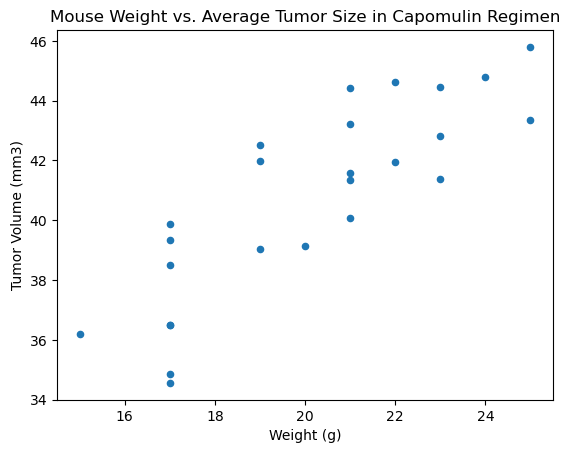

In [116]:
# Generate a scatter plot of average tumor volume vs. mouse weight for the Capomulin regimen
capomulin_mice = cleaned_study_data[cleaned_study_data['Drug Regimen'] == "Capomulin"]
avg_tumor = pd.DataFrame(capomulin_mice.groupby('Mouse ID').mean()['Tumor Volume (mm3)'])
weight = capomulin_mice[['Mouse ID','Weight (g)']].drop_duplicates(subset=['Mouse ID','Weight (g)']).set_index("Mouse ID").sort_index()
weight_vs_tumor = pd.merge(weight, avg_tumor, on=["Mouse ID"])
axes = weight_vs_tumor.plot(kind = 'scatter', x = "Weight (g)", y = "Tumor Volume (mm3)", title = "Mouse Weight vs. Average Tumor Size in Capomulin Regimen")


## Correlation and Regression

The correlation between mouse weight and the average tumor volume is 0.84


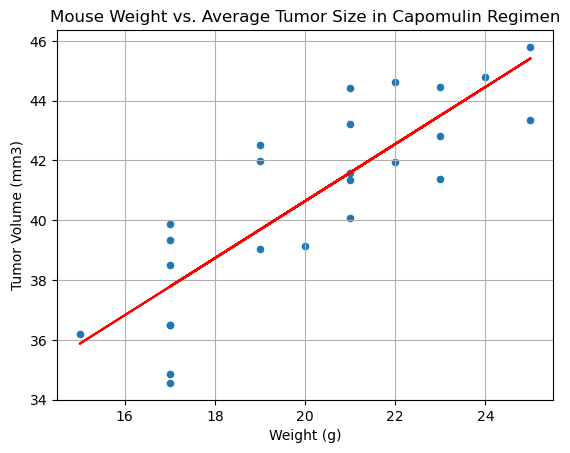

In [118]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen
x_values = weight_vs_tumor["Weight (g)"]
y_values = weight_vs_tumor["Tumor Volume (mm3)"]
correlation = st.pearsonr(x_values, y_values)
print(f"The correlation between mouse weight and the average tumor volume is {round(correlation[0],2)}")

fig, ax = plt.subplots()
ret = weight_vs_tumor.plot(kind = 'scatter', x = "Weight (g)", y = "Tumor Volume (mm3)", grid=True, ax=ax, title = "Mouse Weight vs. Average Tumor Size in Capomulin Regimen")
(slope, intercept, rvalue, pvalue, stderr) = st.linregress(x_values, y_values)
regress_values = x_values * slope + intercept
ret = ax.plot(x_values, regress_values,"r-")